## Data Preprocessing

In [48]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [16]:
#Read the Training and Testing Data
data_path = "Training.csv"
data = pd.read_csv(data_path).dropna(axis = 1)

In [18]:
#Check the dataset's balance
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({"Disease": disease_counts.index, "Counts": disease_counts.values})

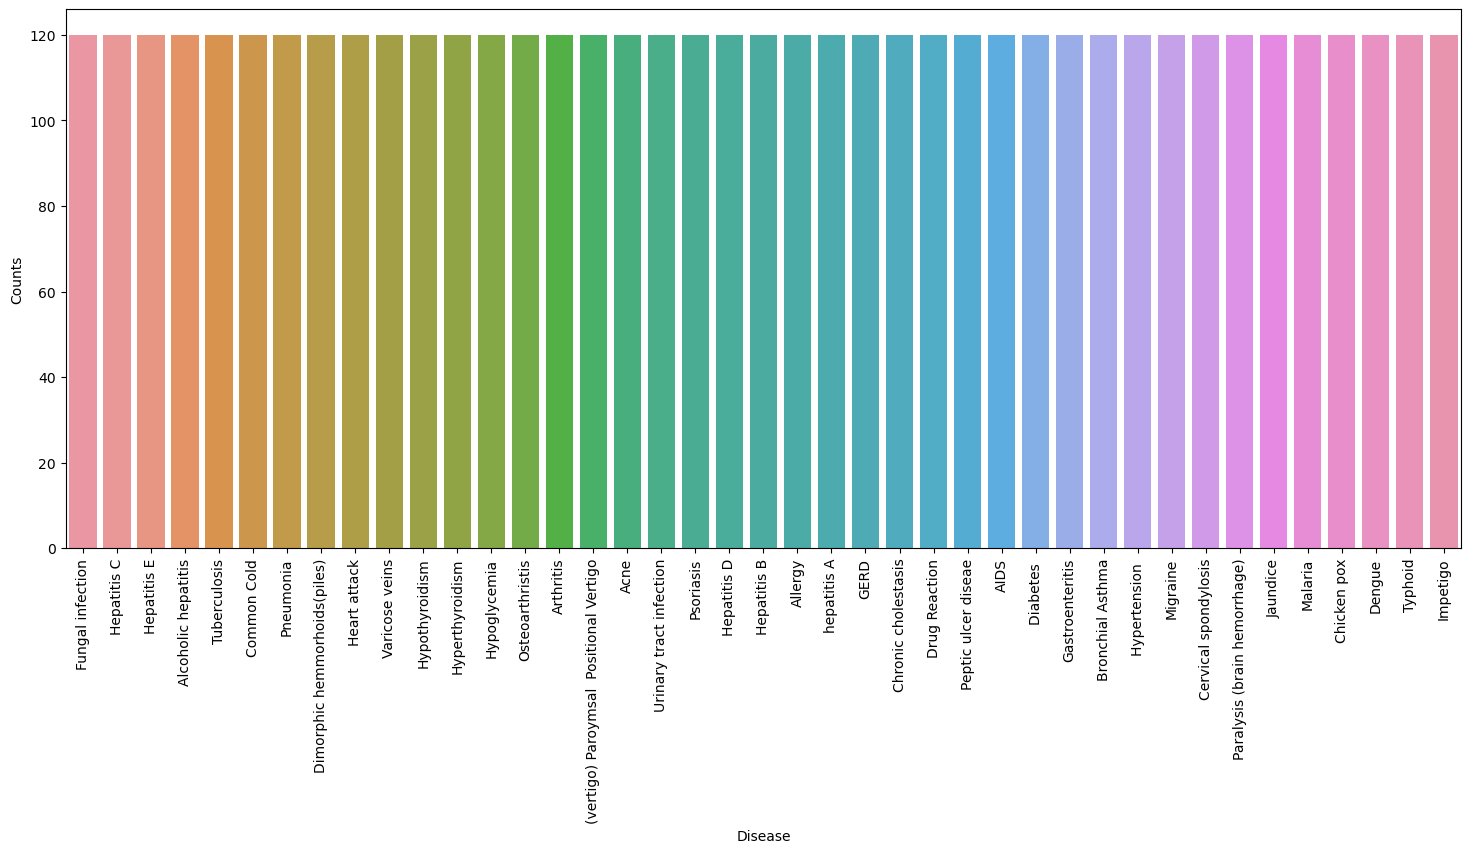

In [46]:
#plot and check the dataset
plt.figure(figsize = (18,7))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

## Encoding and Data Splitting for training and testing

In [50]:
#Label Encode the target values
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [58]:
#Split the Train and Test Dataset
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


## Building the model

In [63]:
#Validate the models using the K-Fold Cross Validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

In [67]:
#(In this Example we will be using the SVC, Gaussian Naive Bayes Classifier and Random Forest Classification)
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=180)
}

In [77]:
#Producing the Cross validation score for all the models used
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Scores: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Scores: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Scores: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Scores: 1.0


## Training and Testing the models

### Model Building

Accuracy on train data by SVM Classifier\: 100.0
Accuracy on test data by SVM Classifier\: 100.0


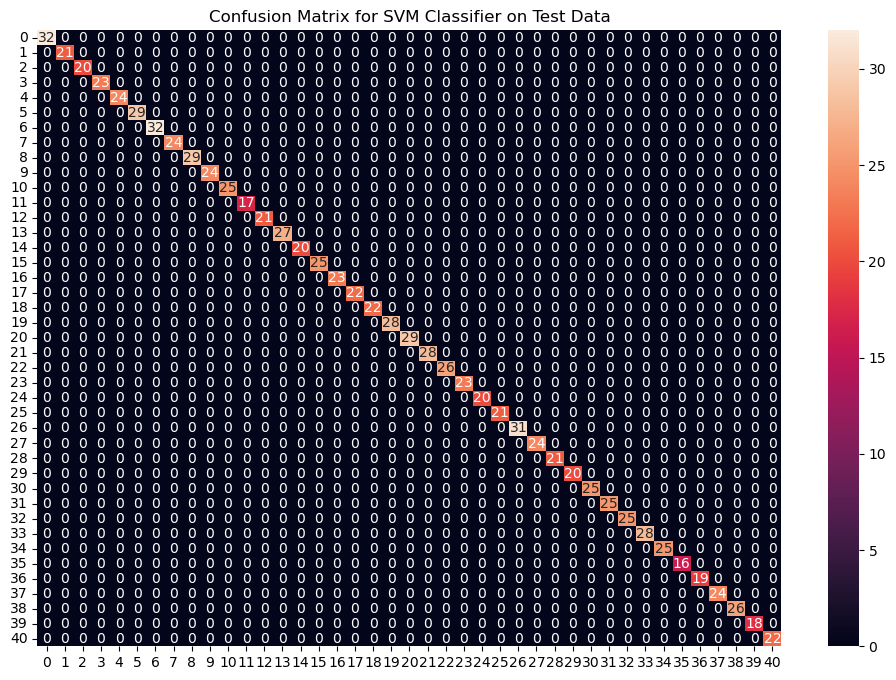

In [80]:
#SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
print(f"Accuracy on train data by SVM Classifier\: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier\: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on Train data by Naive Bayes Classifier\: 100.0
Accuracy on Test data by Naive Bayes Classifier\: 100.0


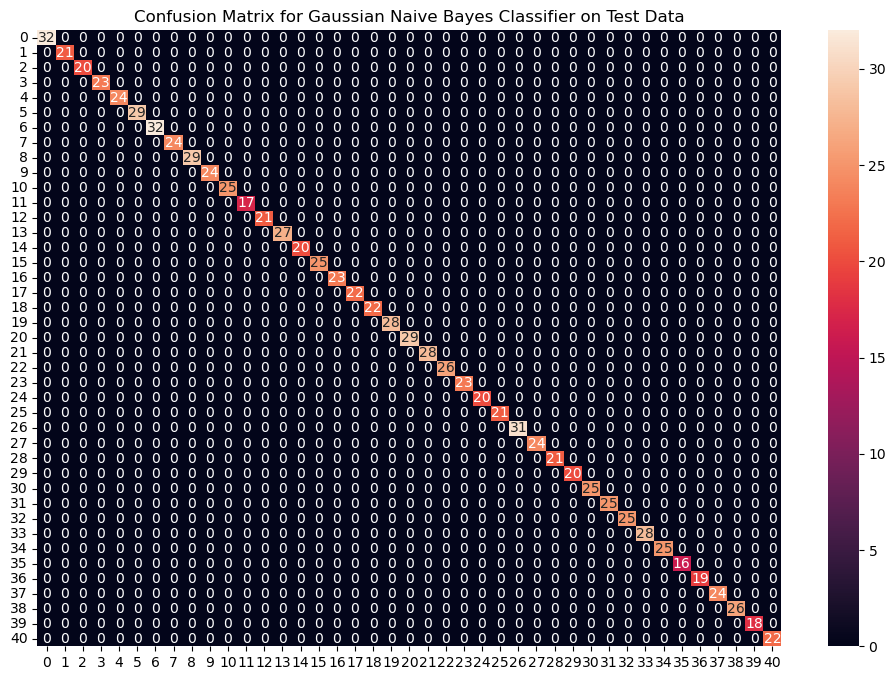

In [83]:
#Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on Train data by Naive Bayes Classifier\: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
print(f"Accuracy on Test data by Naive Bayes Classifier\: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Gaussian Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on train data by Random Forest Classifier\: 100.0
Accuracy on test data by Random Forest Classifier\: 100.0


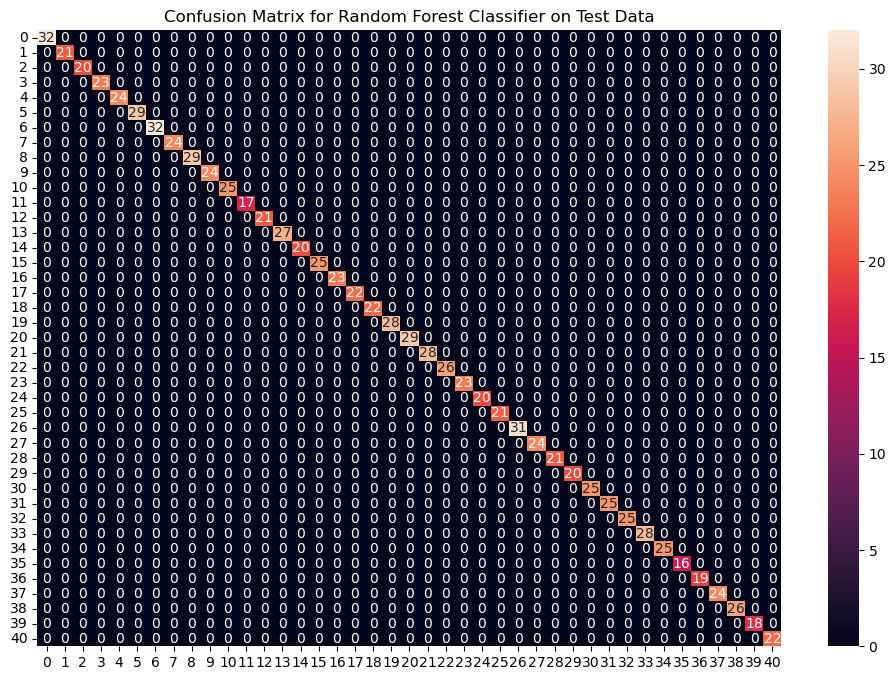

In [85]:
#Random Forrest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier\: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

### Model fitting and Validation of the dataset

In [91]:
#Fitting and Predictions
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


RandomForestClassifier(random_state=18)

In [93]:
#Reading the Test Data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_y = encoder.transform(test_data.iloc[:,-1])

In [97]:
!pip install scipy
from scipy import stats

Accuracy on Test dataset by combined Model: 100.0


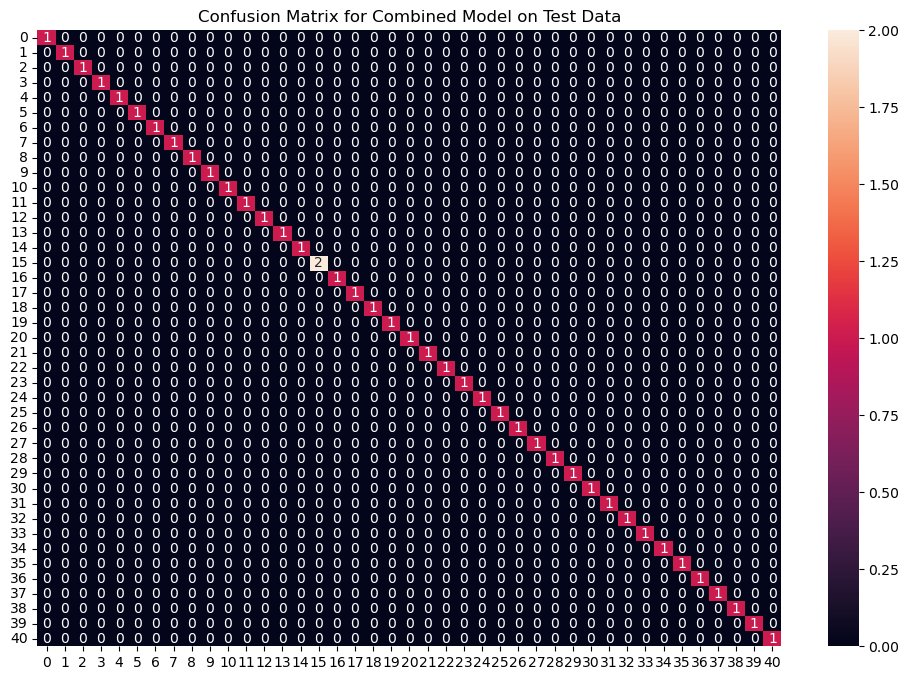

In [99]:
#Preds from all the Classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [stats.mode([i, j, k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]
print(f"Accuracy on Test dataset by combined Model: {accuracy_score(test_y, final_preds)*100}")
cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Data")
plt.show()

## Prediction and Inference

In [102]:
#Inference found from confusion matrix and checking it with acustom symptom function to generate prediction for disease
#creating a symptom index Dict
symptoms = X.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
data_dict = {"symptom_index": symptom_index, "predictions_classes":encoder.classes_}

In [104]:
#Def a func where I/P is the symptoms seperated by commas and O/P is generated by predictions of the models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    #creating I/P data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
    #reshaping the I/P to fit the correct format
    input_data = np.array(input_data).reshape(1,-1)
    #generate individual o/p
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_model_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions
#Testing the function with a input
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_model_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
